Make a free energy surface for T=300 using the data in T=300. 
Do you now see the whole surface? Set the maximum free energy to 10 kT

In [27]:
# import libraries
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# load the trajectory from ../Inputs/ParallelTemp
traj = md.load('../Inputs/ParallelTemp2nd/T300/adp_exchange4temps.trr', 
               top='../Inputs/ParallelTemp2nd/T300/adp_exchange4temps.gro')

# compute phi and psi angles
phi_angles = md.compute_phi(traj, periodic=True)
psi_angles = md.compute_psi(traj, periodic=True)

time = traj.time
phi = phi_angles[1][:,0]
psi = psi_angles[1][:,0]



In [28]:
# compute free energy
H, xedges, yedges = np.histogram2d(phi, psi, bins=100)
# print(xedges)
print(H)
H = -np.log(H)
H -= np.min(H)
# Histogram does not follow Cartesian convention,therefore transpose H for visualization purposes.
H = H.T
print(H)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [2. 1. 0. ... 2. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[       inf        inf 2.80336038 ...        inf        inf        inf]
 [       inf        inf 3.49650756 ...        inf        inf        inf]
 [       inf        inf        inf ...        inf        inf        inf]
 ...
 [       inf 3.49650756 2.80336038 ...        inf        inf        inf]
 [       inf        inf        inf ...        inf        inf        inf]
 [       inf 3.49650756 3.49650756 ...        inf        inf        inf]]


/state/partition1/job-25966850/ipykernel_2338989/642198169.py:5: RuntimeWarning: divide by zero encountered in log
  H = -np.log(H)


Plot saved: ../Figures/ADP_FreeEnergySurface_ParallelTempering300K.pdf


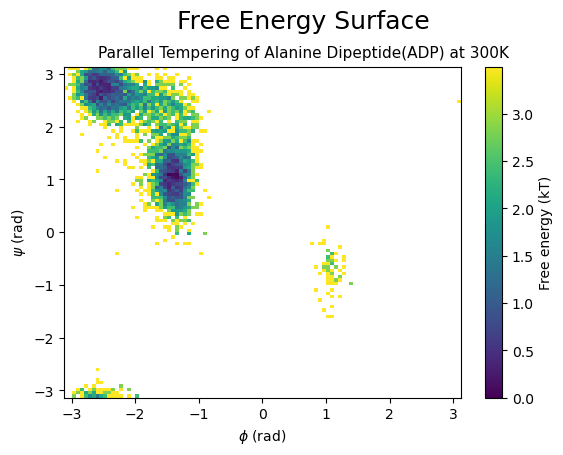

In [29]:
# plot free energy
fig=plt.figure(2)
#plt.interpolation='nearest',origin='lower',extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]])
plt.pcolormesh(xedges, yedges, H)
#plt.imshow(H, extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]])
plt.xlabel('$\phi$ (rad)')
plt.ylabel('$\psi$ (rad)')
colorbar = plt.colorbar()
colorbar.set_label('Free energy (kT)')
colorbar.set_ticks(np.linspace(0,10,5))
#plt.show()

#plt.title('phi_psi_DihedralAngles_VS_Time')
plt.text(x=0.5, y=0.88, s="Free Energy Surface", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "Parallel Tempering of Alanine Dipeptide(ADP) at 300K", fontsize=11, ha="center", transform=fig.transFigure)
# adjust 
plt.subplots_adjust(top=0.8, wspace=0.3)
# save figure
plt.savefig("../Figures/ADP_FreeEnergySurface_ParallelTempering300K.pdf",format="pdf")
print("Plot saved: ../Figures/ADP_FreeEnergySurface_ParallelTempering300K.pdf")
plt.show()